## SMOTE

In [1]:
##########################################################
#  Predicci�n de fuga de clientes de entidad financiera  #
##########################################################

# Se tienen de un a�o del producto CTS (compensaci�n por 
# tiempo de servicios) en todas las agencias de una 
# entidad financiera. 
#
# Variables predictoras:
# Tasa      	      Tasa de inter�s de la cuenta CTS
# Saldo_soles	      Monto de Saldo de cuenta CTS, en Soles.
# Edad	            Edad del cliente en a�os
# EstadoCivil	      Estado Civil: 
#                   Div.Sol.Viu = Divorciado,Soltero,Viudo 
#                   Cas.Conv = Casado, Conviviente
# Regi�n	          Zona a la que pertenece el cliente: 
#                   NORTE.SUR, ORIENTE, CENTRO, LIMA_CALLAO
# CrossSell     	  N�mero de productos vigentes con banco, 
#                   tanto pasivos como activos
# Ratio.Ant         Ratio Ant_Cts / Ant_Banco  
#     Ant_Banco	    Tiempo de antig�edad del cliente (en meses)
#     Ant_Cts	      Tiempo de antig�edad de cuenta CTS (en meses)
#
# Variable dependiente:
# Fuga              0 = cliente no fugado, 1 = cliente fugado

In [2]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [34]:
data = pd.read_csv("../Dataset/desbalanceado/fuga_desbalanceada_cts.csv",delimiter=";", decimal=",")
data.head()

,Id,TasaInteres,saldo_sol,Edad,EstadoCivil,REGION,CrossSell,ratio.ant,Fuga
0,1,4.16,1658.90,26,Div.Sol.Viu,NORTE.SUR,1,1.00,0
1,2,4.88,4691.78,60,Div.Sol.Viu,LIMA_CALLAO,1,0.13,0
2,3,4.88,743.33,27,Div.Sol.Viu,NORTE.SUR,3,0.19,0
3,5,4.16,5897.82,34,Cas.Conv,LIMA_CALLAO,1,0.32,0
4,6,4.16,11113.87,46,Div.Sol.Viu,NORTE.SUR,2,0.67,0


In [35]:
data = data.iloc[:,1:]
data.head()

,TasaInteres,saldo_sol,Edad,EstadoCivil,REGION,CrossSell,ratio.ant,Fuga
0,4.16,1658.90,26,Div.Sol.Viu,NORTE.SUR,1,1.00,0
1,4.88,4691.78,60,Div.Sol.Viu,LIMA_CALLAO,1,0.13,0
2,4.88,743.33,27,Div.Sol.Viu,NORTE.SUR,3,0.19,0
3,4.16,5897.82,34,Cas.Conv,LIMA_CALLAO,1,0.32,0
4,4.16,11113.87,46,Div.Sol.Viu,NORTE.SUR,2,0.67,0


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5533 entries, 0 to 5532
Data columns (total 8 columns):
TasaInteres    5533 non-null float64
 saldo_sol     5533 non-null float64
Edad           5533 non-null int64
EstadoCivil    5533 non-null object
REGION         5533 non-null object
CrossSell      5533 non-null int64
ratio.ant      5533 non-null float64
Fuga           5533 non-null int64
dtypes: float64(3), int64(3), object(2)
memory usage: 345.9+ KB


**LABEL ENCODER**

Text(0,0.5,'Frequency')

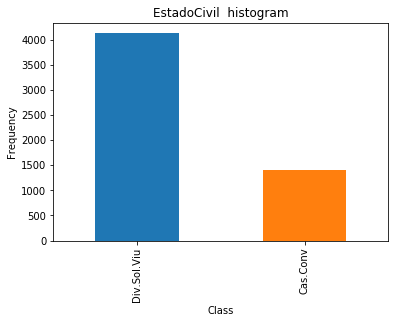

In [46]:
pd.value_counts(data['EstadoCivil']).plot.bar()
plt.title('EstadoCivil  histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

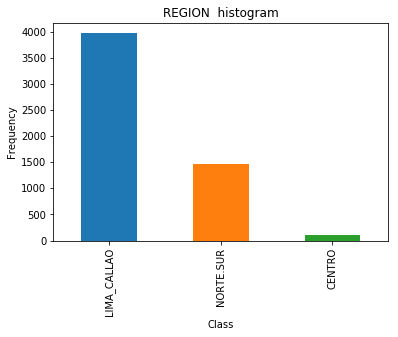

In [47]:
pd.value_counts(data['REGION']).plot.bar()
plt.title('REGION  histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')

In [45]:
from sklearn.preprocessing import LabelEncoder

In [49]:
cols = ['EstadoCivil', 'REGION']
lb_make = LabelEncoder()
for col in cols:
    data[col] = lb_make.fit_transform(data[col])

data.head()

,TasaInteres,saldo_sol,Edad,EstadoCivil,REGION,CrossSell,ratio.ant,Fuga
0,4.16,1658.90,26,1,2,1,1.00,0
1,4.88,4691.78,60,1,1,1,0.13,0
2,4.88,743.33,27,1,2,3,0.19,0
3,4.16,5897.82,34,0,1,1,0.32,0
4,4.16,11113.87,46,1,2,2,0.67,0


### Desbalance

In [51]:
data["Fuga"].value_counts()*100/data.shape[0]

0    94.903307
1     5.096693
Name: Fuga, dtype: float64

Text(0,0.5,'Frequency')

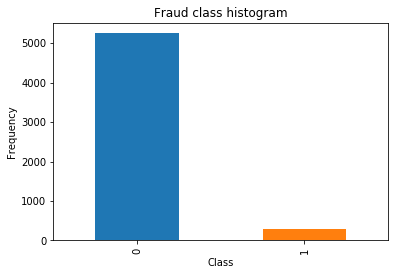

In [52]:
pd.value_counts(data['Fuga']).plot.bar()
plt.title('Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')

In [53]:
data.isnull().sum()

TasaInteres    0
 saldo_sol     0
Edad           0
EstadoCivil    0
REGION         0
CrossSell      0
ratio.ant      0
Fuga           0
dtype: int64

In [54]:
X = data.iloc[:, data.columns != 'Fuga']
y = data.iloc[:, data.columns == 'Fuga']
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (5533, 7)
Shape of y: (5533, 1)


In [55]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (3873, 7)
Number transactions y_train dataset:  (3873, 1)
Number transactions X_test dataset:  (1660, 7)
Number transactions y_test dataset:  (1660, 1)


In [56]:
print("Y TRAIN: \n",y_train["Fuga"].value_counts())
print("Y TEST: \n",y_test["Fuga"].value_counts())

Y TRAIN: 
 0    3671
1     202
Name: Fuga, dtype: int64
Y TEST: 
 0    1580
1      80
Name: Fuga, dtype: int64


### Aplicamos SMOTE

In [57]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

C:\Users\noy-4\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [62]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, the shape of train_X: (7342, 7)
After OverSampling, the shape of train_y: (7342,) 

After OverSampling, counts of label '1': 3671
After OverSampling, counts of label '0': 3671


In [70]:
x_train_sm = pd.DataFrame(X_train_res,columns=X_train.columns)
x_train_sm.head()

,TasaInteres,saldo_sol,Edad,EstadoCivil,REGION,CrossSell,ratio.ant
0,4.16,20613.56,46.0,0.0,2.0,1.0,0.41
1,4.16,3279.66,30.0,1.0,1.0,2.0,0.75
2,4.16,2093.47,46.0,1.0,1.0,1.0,1.00
3,4.88,3394.85,26.0,1.0,1.0,2.0,0.35
4,4.88,652.85,36.0,1.0,1.0,1.0,0.05


In [72]:
y_train_sm =pd.DataFrame(y_train_res,columns=y_train.columns)
y_train_sm.head()

,Fuga
0,0
1,0
2,0
3,0
4,0


Text(0,0.5,'Frequency')

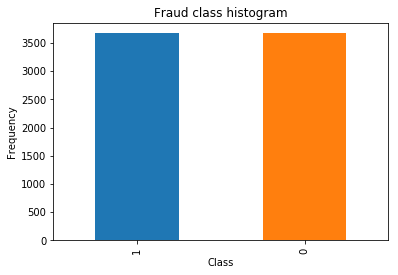

In [73]:
pd.value_counts(y_train_sm['Fuga']).plot.bar()
plt.title('Fuga class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')

# Modelado

### Random Forest

**SIN BALANCEO**

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
clf = RandomForestClassifier(n_estimators=10, criterion='gini',max_depth=10,max_features='auto')
clf = clf.fit(X_train, y_train)

C:\Users\noy-4\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [76]:
from sklearn.metrics import accuracy_score

In [81]:
pred_rf = clf.predict(X_test)
pred_rf[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [82]:
accuracy_score(y_test, pred_rf)

0.9530120481927711

In [83]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set(style="ticks", color_codes=True)

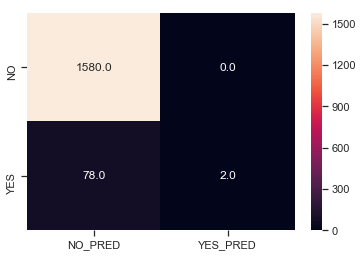

In [89]:
conf = confusion_matrix(y_test, pred_rf)
label_y = ['NO','YES']
label_x = ['NO_PRED', 'YES_PRED']
sns.heatmap(conf, annot=True, xticklabels=label_x, yticklabels=label_y,fmt=".1f")

**CON BALANCEO SMOTE**

In [90]:
clf = RandomForestClassifier(n_estimators=10, criterion='gini',max_depth=10,max_features='auto')
clf = clf.fit(x_train_sm, y_train_sm)

C:\Users\noy-4\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [91]:
pred_rf = clf.predict(X_test)
pred_rf[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [92]:
accuracy_score(y_test, pred_rf)

0.9289156626506024

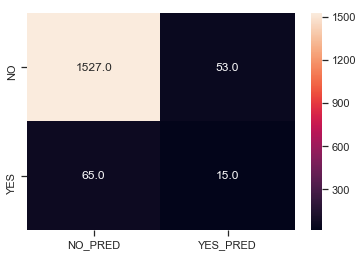

In [93]:
conf = confusion_matrix(y_test, pred_rf)
label_y = ['NO','YES']
label_x = ['NO_PRED', 'YES_PRED']
sns.heatmap(conf, annot=True, xticklabels=label_x, yticklabels=label_y,fmt=".1f")

In [95]:
clf.feature_importances_

array([0.17508767, 0.17265472, 0.07350905, 0.14361523, 0.16022079,
       0.18431959, 0.09059295])

In [96]:
importance = pd.DataFrame()
importance['variable'] = X_train.columns
importance['importance'] = clf.feature_importances_
importance_ordered = importance.sort_values(by="importance",ascending = False)
importance_ordered

,variable,importance
5,CrossSell,0.184320
0,TasaInteres,0.175088
1,saldo_sol,0.172655
4,REGION,0.160221
3,EstadoCivil,0.143615
6,ratio.ant,0.090593
2,Edad,0.073509


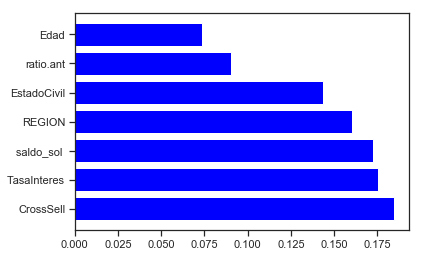

In [97]:
plt.barh(importance_ordered['variable'],importance_ordered['importance'], color = 'blue')
plt.show()

### Catboost

**SIN BALANCEO**

In [102]:
!pip install catboost
#!python -m pip install --upgrade pip

  Using cached https://files.pythonhosted.org/packages/26/8b/97ed7dc482cdf54cc53f19dbf1d5aecc9f77baa3b03ff64cdc6f57f476de/catboost-0.15.1-cp37-none-win_amd64.whl


In [103]:
from catboost import CatBoostClassifier

ValueError: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 192 from PyObject